In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes_012_health_indicators.csv")

# quick checks
print(df.shape)
display(df.head())
df.info()


(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
# missing values (counts + percent)
missing_count = df.isnull().sum()

print(pd.concat([missing_count], axis=1).rename(columns={0:"missing_count",1:"missing_pct"}))

# duplicates
print("Duplicate rows:", df.duplicated().sum())


                      missing_count
Diabetes_012                      0
HighBP                            0
HighChol                          0
CholCheck                         0
BMI                               0
Smoker                            0
Stroke                            0
HeartDiseaseorAttack              0
PhysActivity                      0
Fruits                            0
Veggies                           0
HvyAlcoholConsump                 0
AnyHealthcare                     0
NoDocbcCost                       0
GenHlth                           0
MentHlth                          0
PhysHlth                          0
DiffWalk                          0
Sex                               0
Age                               0
Education                         0
Income                            0
Duplicate rows: 23899


In [9]:
# list columns / dtypes
print(df.dtypes)

# detect possible target columns (heuristic)
possible_targets = [c for c in df.columns if 'diabet' in c.lower() or 'target' in c.lower()]
print("Possible target cols:", possible_targets)

# show distribution for target(s)
for t in possible_targets:
    print(t, df[t].value_counts(dropna=False))


Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
Possible target cols: ['Diabetes_012']
Diabetes_012 Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc = df[num_cols].describe().T
display(desc)


,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


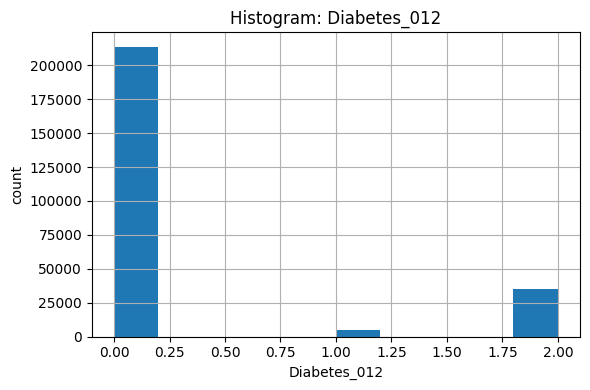

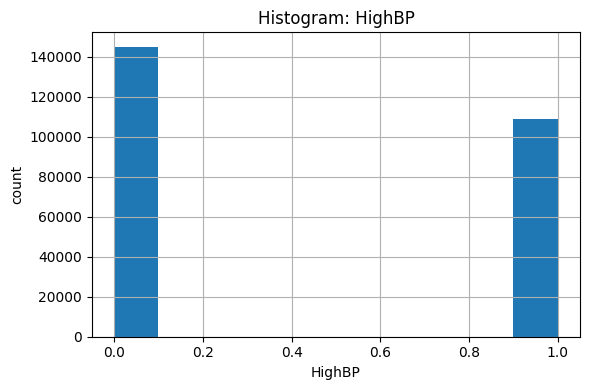

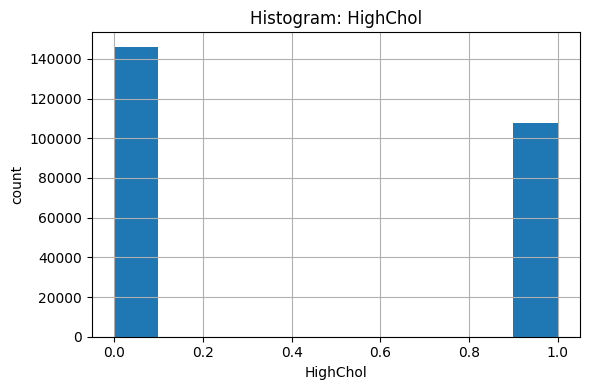

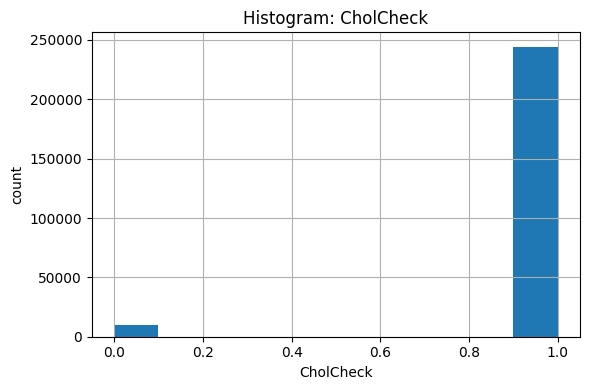

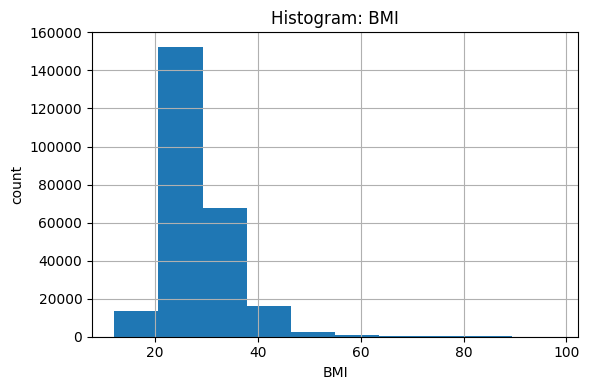

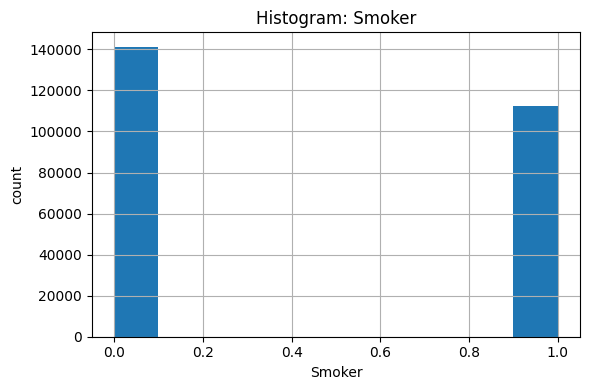

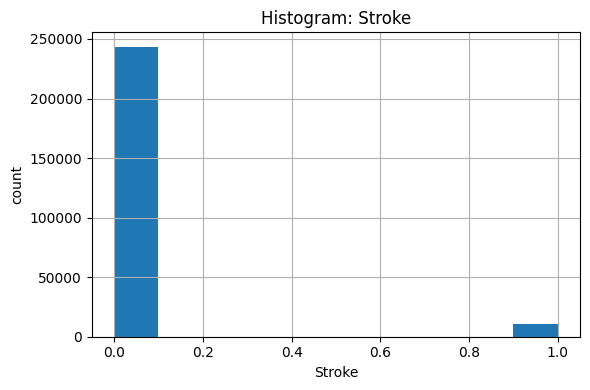

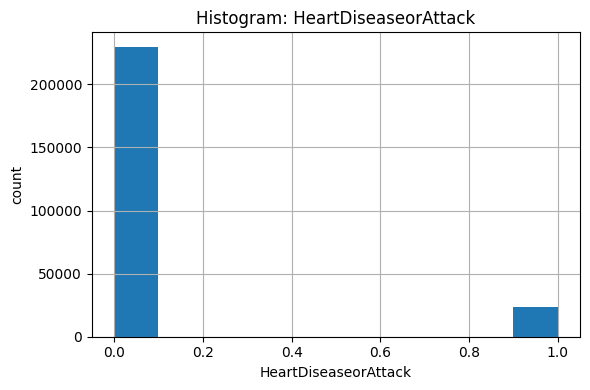

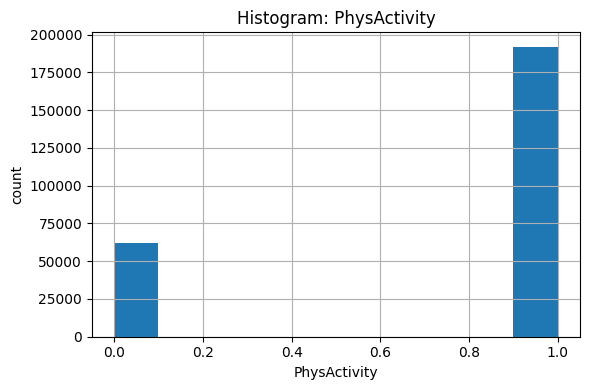

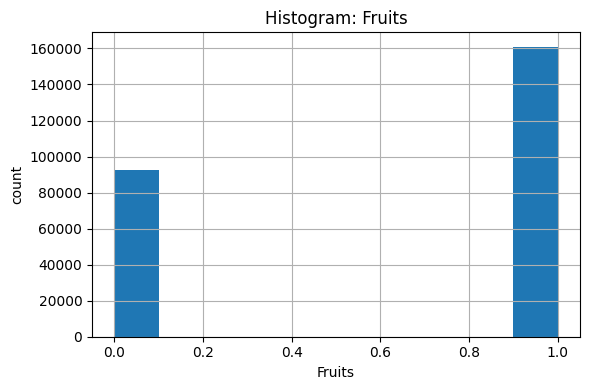

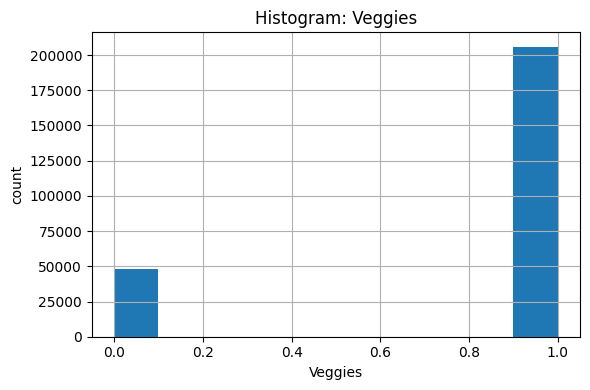

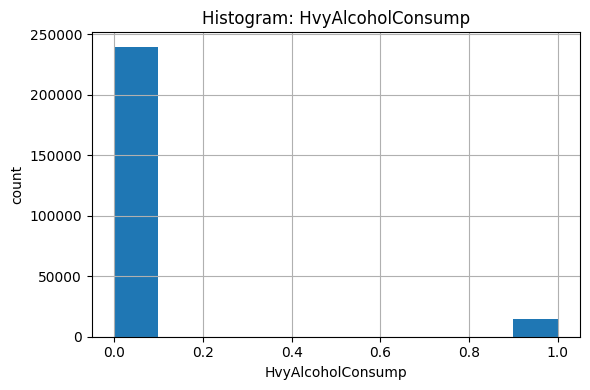

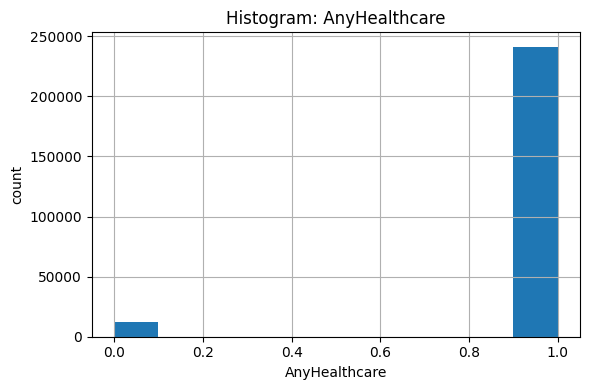

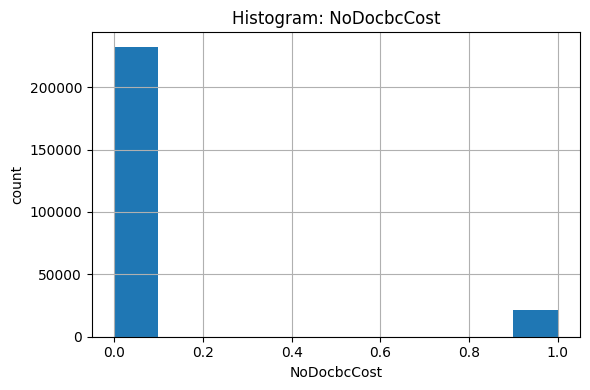

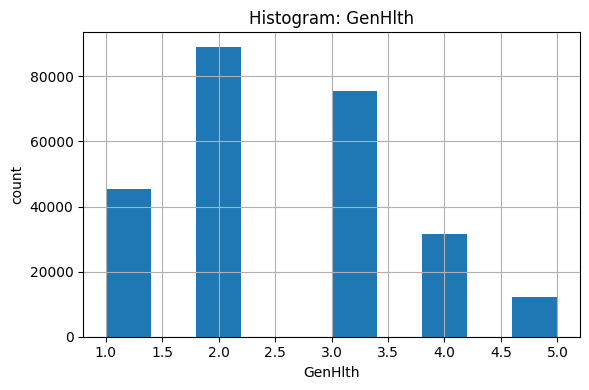

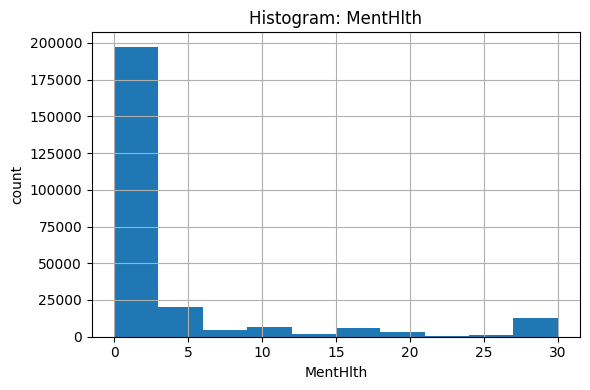

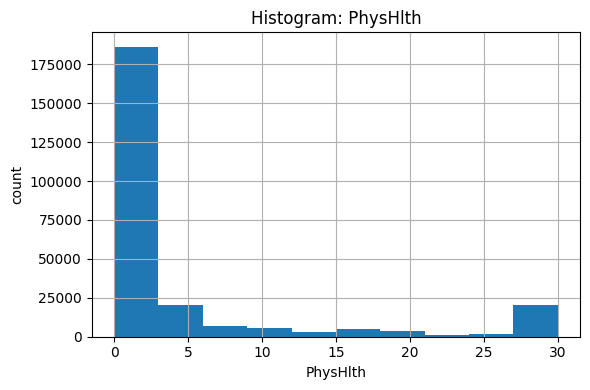

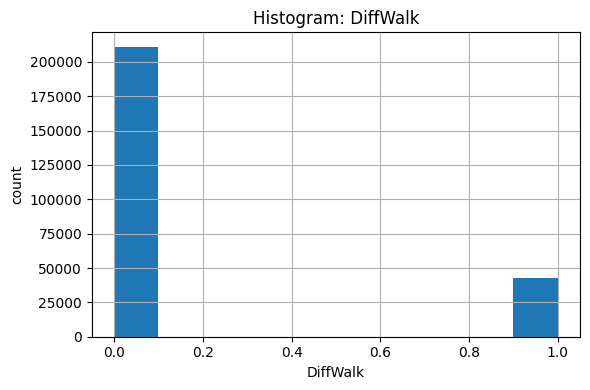

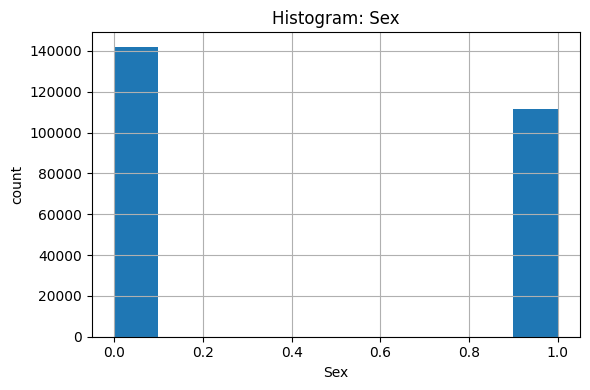

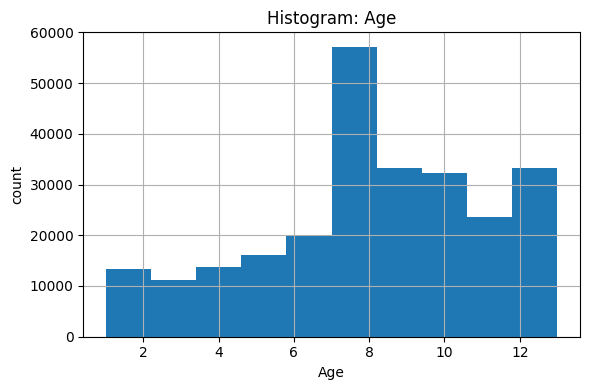

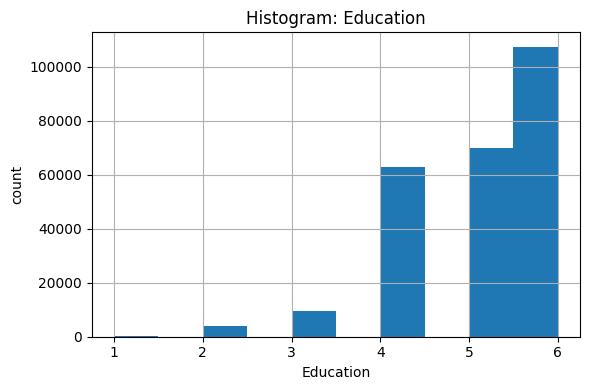

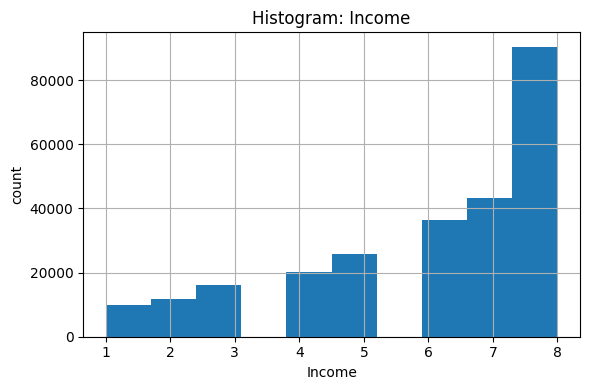

In [27]:
import matplotlib.pyplot as plt
import os
os.makedirs("/mnt/data/eda_plots", exist_ok=True)



for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].dropna().hist()   # use matplotlib histogram
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(f"/mnt/data/eda_plots/hist_{col}.png")
    plt.show()
    plt.close()
    



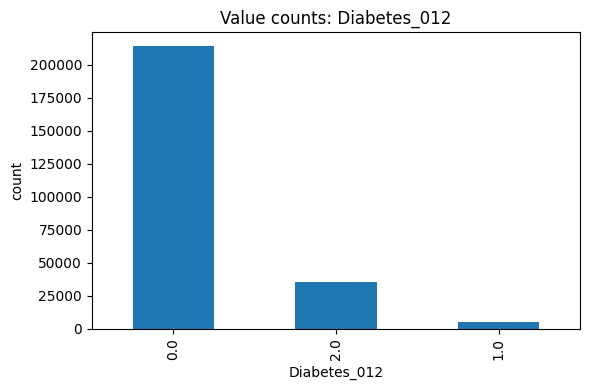

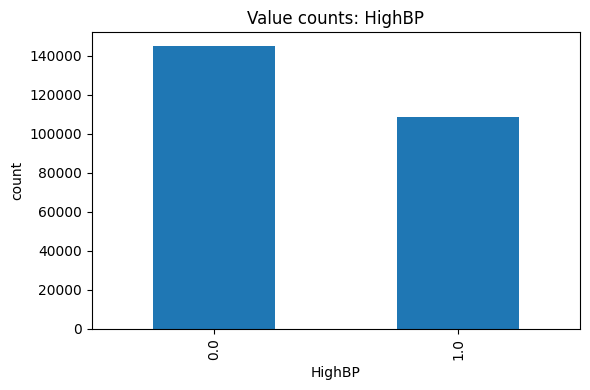

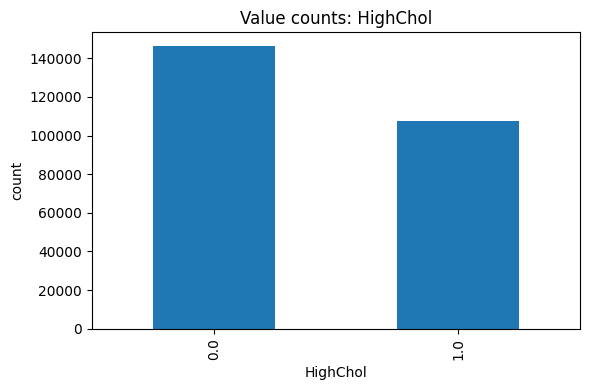

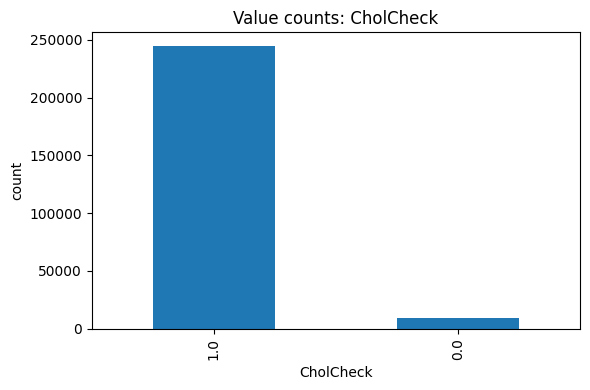

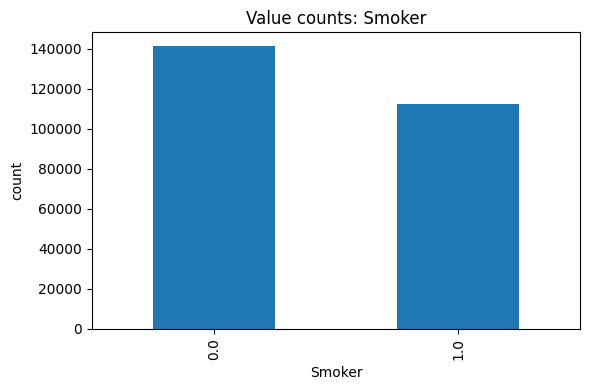

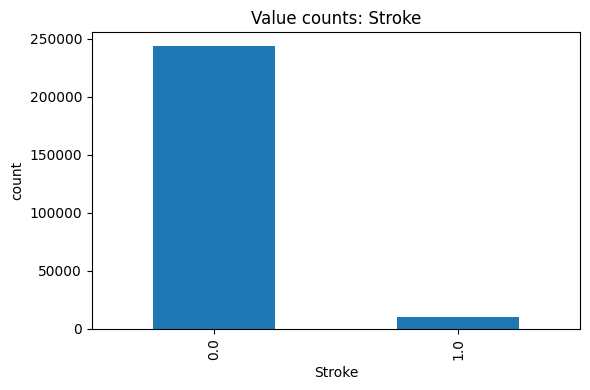

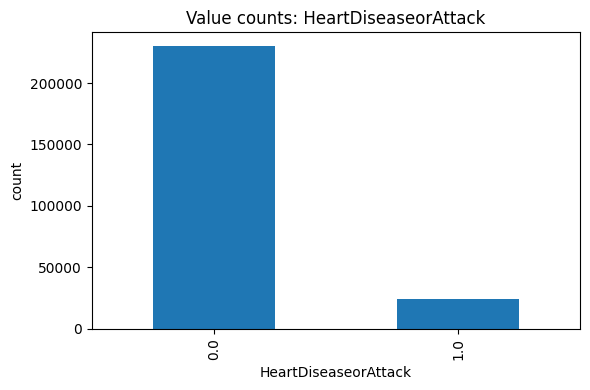

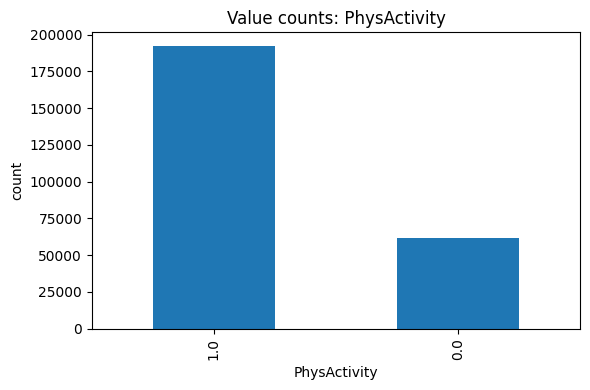

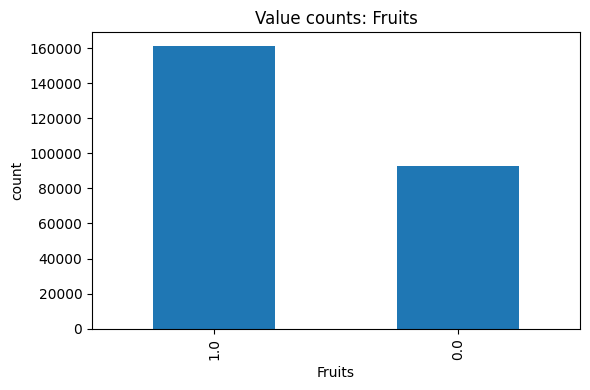

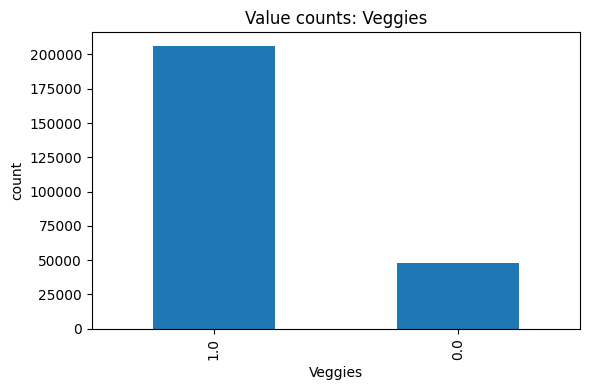

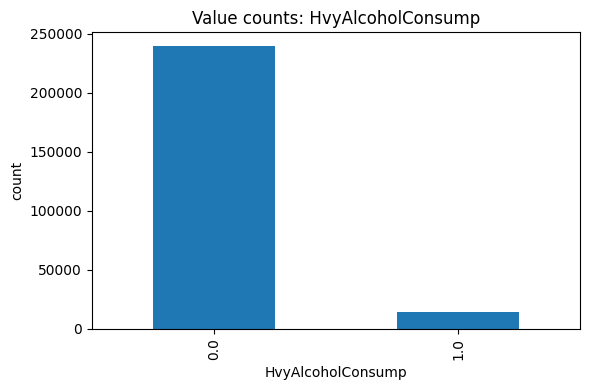

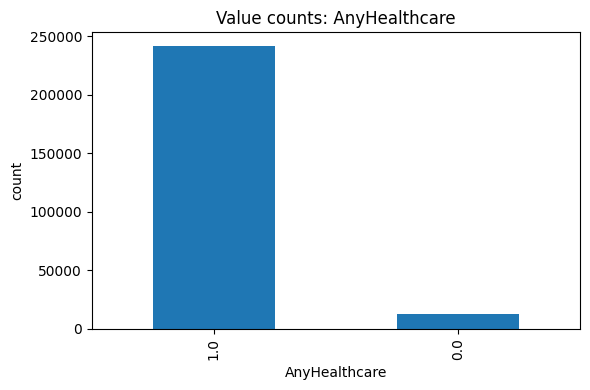

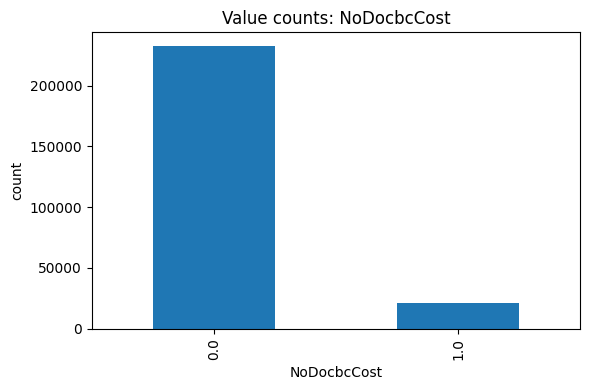

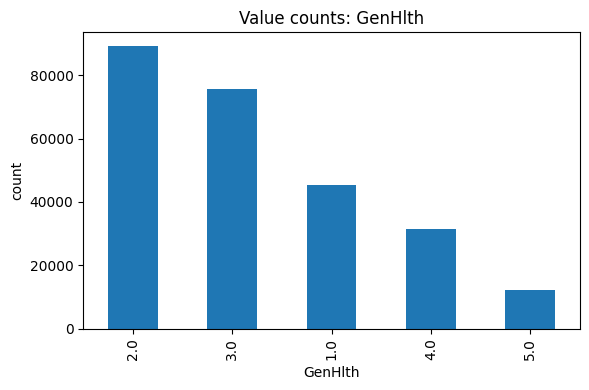

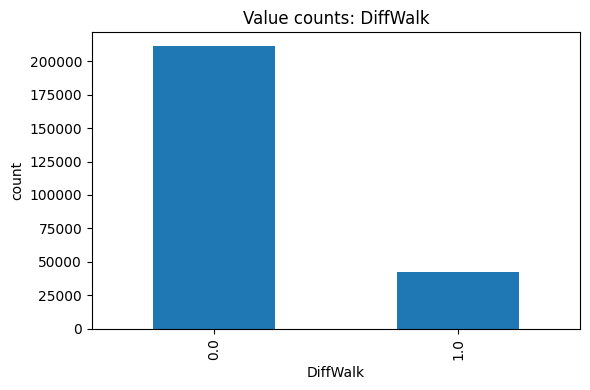

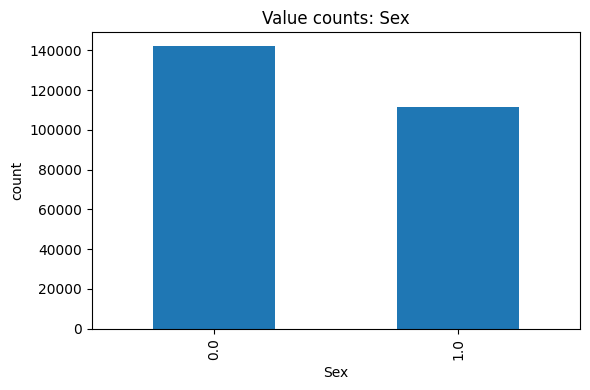

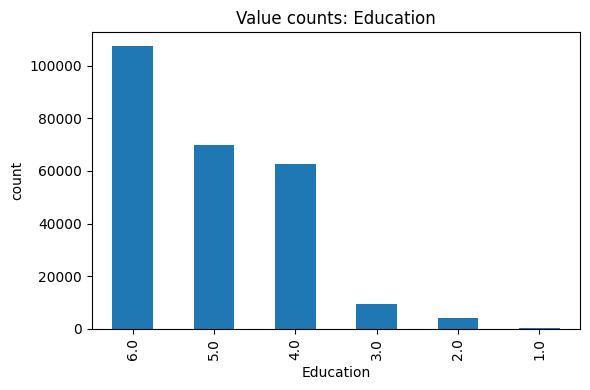

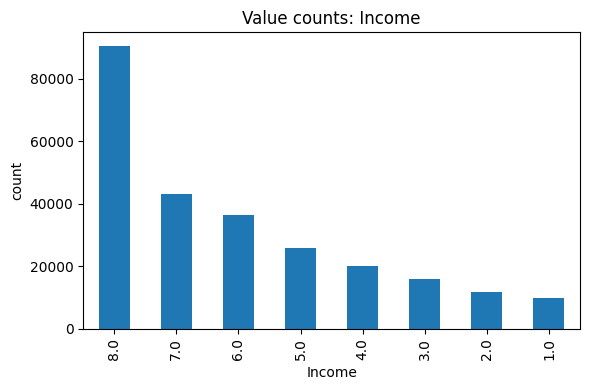

In [28]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()  # if any
# if numeric columns are actually categories (e.g., 0/1/2), treat them similarly
# Example (treat columns with small unique counts as categorical)
small_card_cols = [c for c in df.columns if df[c].nunique() < 10]
for col in small_card_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot.bar()
    plt.title(f"Value counts: {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(f"/mnt/data/eda_plots/bar_{col}.png")
    plt.show()
    plt.close()


In [18]:
outlier_summary = []
for col in num_cols:
    s = df[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_lower = (s < lower).sum()
    n_upper = (s > upper).sum()
    outlier_summary.append({
        "feature": col,
        "n_nonnull": s.shape[0],
        "n_lower_outliers": int(n_lower),
        "n_upper_outliers": int(n_upper),
        "pct_lower_outliers": float(n_lower / s.shape[0] * 100),
        "pct_upper_outliers": float(n_upper / s.shape[0] * 100)
    })
outlier_df = pd.DataFrame(outlier_summary).sort_values(by="pct_upper_outliers", ascending=False)
display(outlier_df)


,feature,n_nonnull,n_lower_outliers,n_upper_outliers,pct_lower_outliers,pct_upper_outliers
17,DiffWalk,253680,0,42675,0.000000,16.822375
16,PhysHlth,253680,0,40949,0.000000,16.141990
0,Diabetes_012,253680,0,39977,0.000000,15.758830
15,MentHlth,253680,0,36208,0.000000,14.273100
7,HeartDiseaseorAttack,253680,0,23893,0.000000,9.418559
13,NoDocbcCost,253680,0,21354,0.000000,8.417692
11,HvyAlcoholConsump,253680,0,14256,0.000000,5.619678
14,GenHlth,253680,0,12081,0.000000,4.762299
6,Stroke,253680,0,10292,0.000000,4.057080
4,BMI,253680,27,9820,0.010643,3.871019


In [20]:
dq_report = pd.DataFrame({
    "feature": df.columns,
    "dtype": [str(t) for t in df.dtypes],
    "n_missing": df.isnull().sum().values,
    "pct_missing": (df.isnull().mean() * 100).values,
    "n_unique": df.nunique().values,
})
dq_report = dq_report.merge(outlier_df[['feature','n_lower_outliers','n_upper_outliers','pct_lower_outliers','pct_upper_outliers']],
                            on='feature', how='left')
dq_report.to_csv("data_quality_report.csv", index=False)


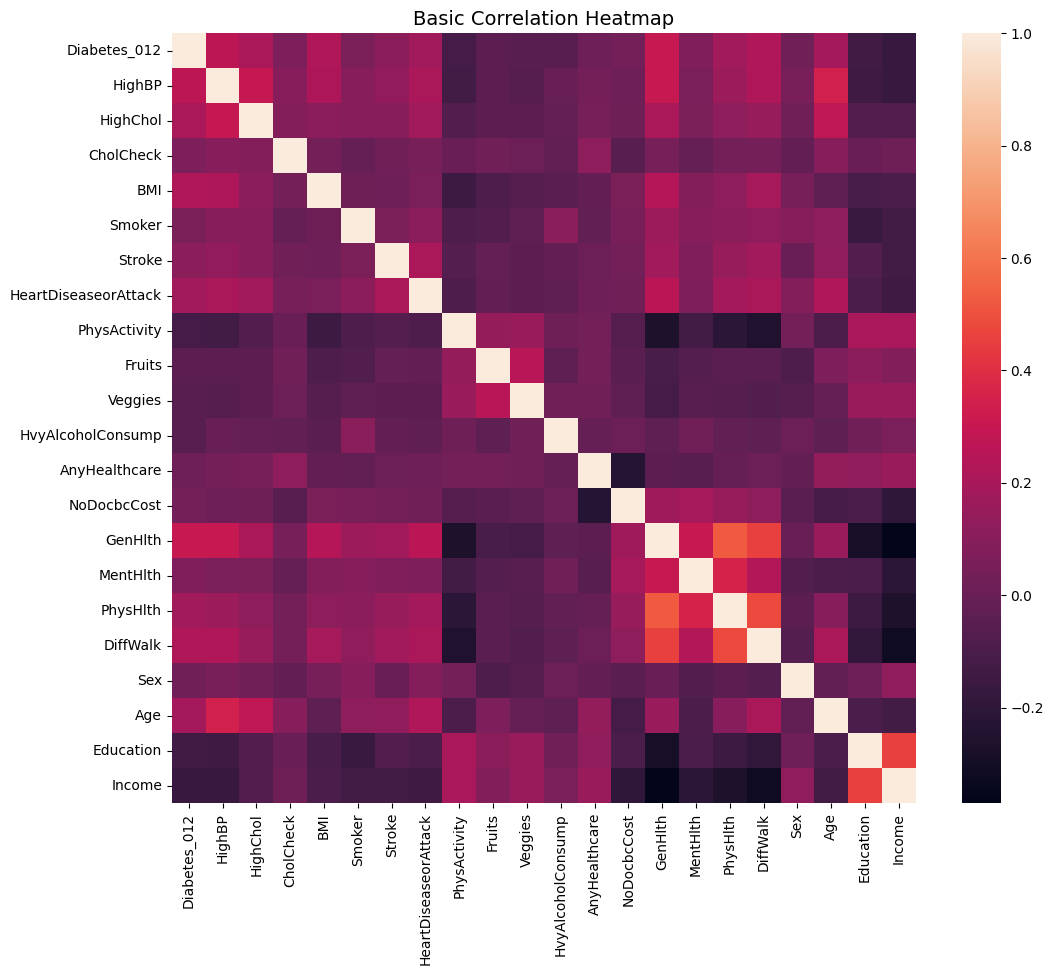

In [30]:
import seaborn as sns
corr = df.corr()  # Pearson correlation by default

plt.figure(figsize=(12, 10))
sns.heatmap(corr)
plt.title("Basic Correlation Heatmap", fontsize=14)
plt.show()



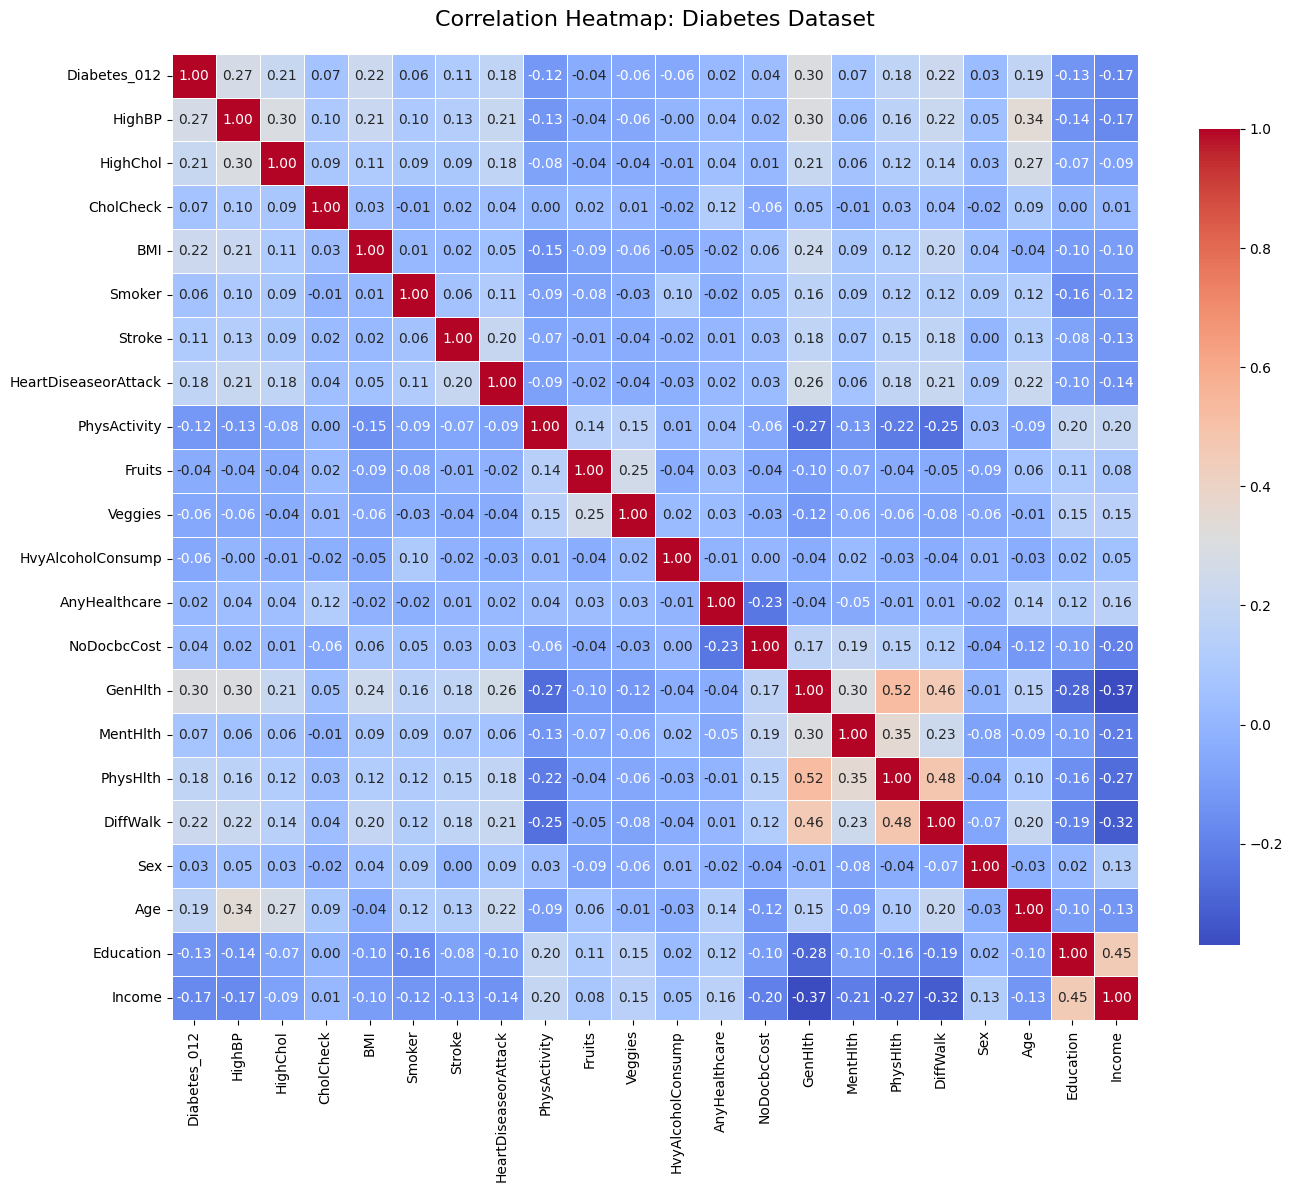

In [31]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap="coolwarm",         # color scheme (you can also try 'viridis', 'plasma', 'RdBu', etc.)
    annot=True,              # write correlation values inside the cells
    fmt=".2f",               # round to 2 decimals
    linewidths=0.5,          # thin lines between cells
    square=True,             # make cells square
    cbar_kws={"shrink": 0.8} # control colorbar size
)
plt.title("Correlation Heatmap: Diabetes Dataset", fontsize=16, pad=20)
plt.tight_layout()
plt.show()
